# CNN Submission 2

In [1]:
import datetime
print("Last modified: ", datetime.datetime.now().strftime("%d/%m/%Y %H:%M:%S") + "\n")

Last modified:  16/01/2024 22:33:05



## Practical Exploration of Hebbian Learning - Part 1 (week 9) Question (2-4)
- **(2-4):** Run your implementation of the Hebb rule on `data_HL_simple.txt`, and inspect the weights $w$ after every step of the algorithm. Identify the correlational pattern that the algorithm discovers. Are there any positively or negatively correlated features in these data according to the pattern seen in $w$?

In [2]:
import numpy as np

# load data from the text file
data = np.loadtxt('data_HL_simple.txt', usecols=range(5))
print(data[1:50,:])

# we need a vector of 5 parameters
w = np.random.normal(0, 0.5, 5)

print("initial weights")
print(w)

# learning rate; don't change the learning rate epsilon when you are working on questions 2 and 3, unless you really know what you are doing. You may want to make the learning rate dependent on the epoch number to converge to a stable solution.
epsilon = 0.01

num_iterations = 6

update = 0
# we can do a fixed number of iterations because the simple Hebb rule won't converge
for i in range(num_iterations):
    for x in data:

        # linear activation formula
        y = np.dot(x,w)
        # simple hebb rule
        DW = epsilon*y*x
        # update the new weight by adding the change in weight to the old weight
        w = DW + w 
        
        update = update + 1
        if update % 10 == 0:
            # print every 10th update
            print("\tCurrent input: " + str(x))
            # print the weights for every x to see how they are evolving
            print("New Weights:\n" + str(w))

# the final weights
print(w)

[[-1.  0. -1. -1.  1.]
 [-1. -1. -1. -1.  1.]
 [ 1.  0.  1.  1. -1.]
 [ 0. -1.  0.  0.  0.]
 [ 1.  0.  1.  1. -1.]
 [ 0.  0.  1.  1. -1.]
 [ 0.  1.  1.  1. -1.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0. -1.  1.  1. -1.]
 [ 0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0. -1. -1.  1.]
 [ 1.  1.  1.  1. -1.]
 [-1.  0.  0.  0.  0.]
 [ 0. -1. -1. -1.  1.]
 [-1. -1.  0.  0.  0.]
 [-1.  0. -1. -1.  1.]
 [ 0.  0. -1. -1.  1.]
 [ 1.  1.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.]
 [-1. -1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.]
 [ 0.  0. -1. -1.  1.]
 [ 0.  0. -1. -1.  1.]
 [ 0.  0. -1. -1.  1.]
 [ 0.  1.  0.  0.  0.]
 [-1.  0. -1. -1.  1.]
 [ 0.  1.  1.  1. -1.]
 [ 0. -1.  0.  0.  0.]
 [ 1. -1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  1.  1. -1.]
 [-1.  0.  1.  1. -1.]
 [ 0.  0. -1. -1.  1.]
 [ 1.  0. -1. -1.  1.]
 [ 0.  0.  1.  1. -1.]
 [ 1.  1. -1. -1.  1.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0. -1. -1.  1.]
 [ 0. -1. -

### Answer:
(If we index each input in the final row starting from 0)
The weights for values 2 and 3 are very similar and the final weight is also quite inversely similiar to values 2 and 3.

2 and 3 are positively correlated and 4 is negatively correlated compared to values 2 and 3.

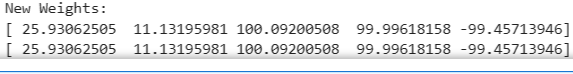

## Practical Exploration of Hebbian Learning - Part 1 (week 9) Question (3-4)
- **(3-4):** The next step requires coding. Extend the code that implements simple Hebbian learning above and implement Oja's rule to learn one principal component for these data. We are interested in exactly one principal component in this exercise. Your implementation of Oja's rule should appear in the Python block below.

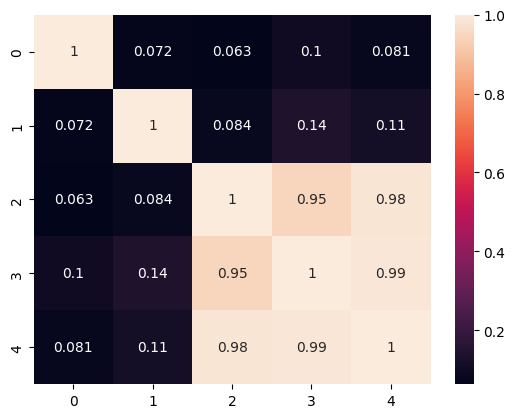

In [3]:
# load the new dataset
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
data = np.loadtxt('data_two_groups.txt', usecols=range(5))

# correlation matrix in pandas and the heatmap
df = pd.DataFrame(data)
corrMatrix = df.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

### Answer:

In [4]:
import numpy as np

# load data from the text file
data = np.loadtxt('data_two_groups.txt', usecols=range(5))
print(data[1:50,:])

# we need a vector of 5 parameters
w = np.random.normal(0, 0.5, 5)

print("initial weights")
print(w)

# learning rate; don't change the learning rate epsilon when you are working on questions 2 and 3, unless you really know what you are doing. You may want to make the learning rate dependent on the epoch number to converge to a stable solution.
epsilon = 0.01

num_iterations = 6

update = 0
# we can do a fixed number of iterations because the simple Hebb rule won't converge
for i in range(num_iterations):
    for x in data:

        y = np.dot(x,w)
        # Implemented Ojas rule
        DW = epsilon * ((x*y) - (y*y) * w)
        w = DW + w 
        
        update = update + 1
        if update % 10 == 0:
            # print every 10th update
            print("\tCurrent input: " + str(x))
            # print the weights for every x to see how they are evolving
            print("New Weights:\n" + str(w))

# the final weights
print(w)

[[-2.07523136e-01 -3.67737727e-01  1.22059844e+00  5.50488774e-01
   1.88427215e+00]
 [-1.57125555e+00  1.32390861e+00 -1.47812951e+00 -1.43172722e+00
  -3.19127369e+00]
 [-8.22905621e-01  2.27103446e+00 -2.12484964e+00 -2.12484964e+00
  -4.13049738e+00]
 [ 9.70277635e-01  9.13368651e-01 -3.52387133e+00 -3.22573866e+00
  -6.63143683e+00]
 [-1.99767860e+00 -2.78435880e+00 -1.43481397e+00 -1.43481397e+00
  -2.83144180e+00]
 [ 1.86053078e-01  1.14523511e+00  1.83644938e+00  1.83644938e+00
   3.69732649e+00]
 [ 2.46378663e+00  4.58459335e-01  2.44081247e+00  2.44081247e+00
   4.85786203e+00]
 [ 7.82371225e-01  1.04699156e+00 -1.50115280e+00 -1.50115280e+00
  -3.12595173e+00]
 [-1.42258423e-01  9.20445234e-01 -1.62046158e+00 -1.62046158e+00
  -3.44263005e+00]
 [-1.49476376e+00  1.21434406e+00 -1.27598364e+00 -1.72432930e+00
  -2.69602366e+00]
 [-2.14380466e-02 -2.24415235e-03  3.22637550e+00  3.22637550e+00
   6.70089720e+00]
 [-3.66830400e-01  9.03558428e-01 -1.54713394e+00 -1.54713394e+00

all principal components:
[[0.01640681 0.02155885 0.40640946 0.4106701  0.81574963]]


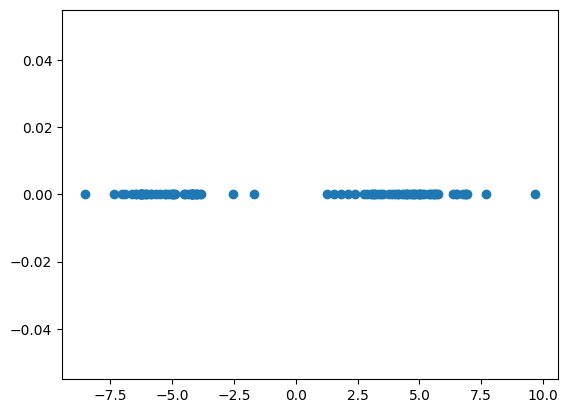

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# load data from the text file
#data = np.loadtxt('data_two_groups.txt', usecols=range(5))
# print("original data")
# print(data)

# do PCA and show the data in 1D
plt.figure(1)
pca = PCA(n_components=1)
# fit the model parameters
pca.fit(data)
print("all principal components:")
print(pca.components_)
# project the data to the new dimension
data_pca = pca.transform(data)
# a vector of zeros for the scatter plot
yaxis = np.zeros(data_pca.shape[0])
plt.scatter(data_pca[:,0], yaxis)
plt.show()

## Practical Exploration of Hebbian Learning - Part 1 (week 9) Question (3-5)
- **(3-5):** Run your implementation of Oja's rule on `data_two_groups.txt`. Use the vector of parameters $w$ that you will obtain using Oja's rule to project the original five-dimensional data into 1 dimension defined by $w$. The image that you will obtain should be similar to the one produced by PCA in `sklearn` above. The images may be identical if you have run Oja's rule until convergence, but this is not guaranteed. This step will allow you to see very clearly how a low dimensional representation (and hence data compression) can be achieved using Hebbian learning/Oja's rule or PCA.

### Answer:

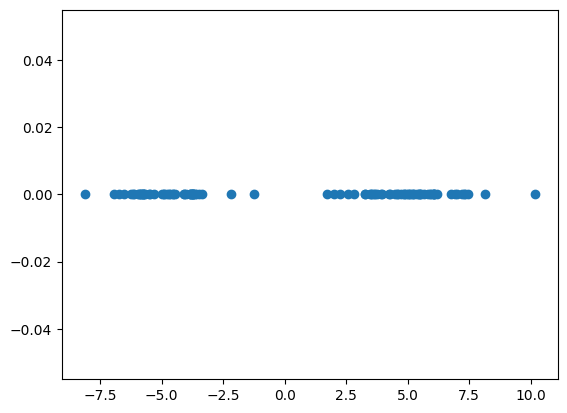

In [6]:
plt.figure(2)
# Calculate the Oja's rule output by taking the dot product of 'data' and 'w'
oja = np.dot(data, w)
# Create a vector of zeros for the y-axis to plot against
yaxis = np.zeros(oja.shape[0])
# Create a scatter plot of the Oja's rule output
plt.scatter(oja, yaxis)
plt.show()

## Practical Exploration of Hebbian Learning - Part 2 (week 10) Question (1-2)
- **(1-2):** In the code, identify Python variables that correspond to the symbol $y_j$ in our lecture notes. What is the range of $j$ in this example? How does the number of values of $y_j$ relate to the number of data examples?

In [7]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

# load the data from sklearn
iris = load_iris()

# X is np.ndarray and it contains four predictor attributes
X = iris.data
y = iris.target

# print descriptive statistics using pandas data frame
df_X = pd.DataFrame(X)
print(df_X.describe())

                0           1           2           3
count  150.000000  150.000000  150.000000  150.000000
mean     5.843333    3.057333    3.758000    1.199333
std      0.828066    0.435866    1.765298    0.762238
min      4.300000    2.000000    1.000000    0.100000
25%      5.100000    2.800000    1.600000    0.300000
50%      5.800000    3.000000    4.350000    1.300000
75%      6.400000    3.300000    5.100000    1.800000
max      7.900000    4.400000    6.900000    2.500000


iris = load_iris()
-
In the above code we load in the popular iris dataset

X = iris.data
-
This line assigns the feature data to the variable X. The iris.data attribute contains the measurements of the four features (sepal length, sepal width, petal length, and petal width).The variable X is now a NumPy array (np.ndarray) that holds this feature data.

Y = target.data
-
This line assigns the target values to the variable y. The iris.target attribute contains the species labels (target classes) corresponding to each instance in the dataset. In the Iris dataset, there are three classes: setosa, versicolor, and virginica. The variable y is now a NumPy array that holds these target values.

df_X = pd.DataFrame(X)-

This line converts the NumPy array X (containing the feature data) into a pandas DataFrame (df_X). In a DataFrame, each column corresponds to a feature, and each row corresponds to an instance in the dataset. The DataFrame provides a tabular structure, making it easier to work with and analyze the data

print(df_X.describe())-
The describe() method in pandas is used to generate descriptive statistics of the DataFrame. When applied to a DataFrame, it calculates various summary statistics for each numerical column in the DataFrame. The output includes the count, mean, standard deviation, minimum, 25th percentile (Q1), median (50th percentile or Q2), 75th percentile (Q3), and maximum values.
.

In [8]:
# the number of principal components
n_components = 2

pca = PCA(n_components=n_components)

n_components refers to the number of features we want to reduce our dataset to. 

Currently we have 4.

So our number should be less than 4.

We pick 2.

Then we initialise the PCA : pca = PCA(n_components=n_components) 

In [9]:
# We fit the model and then transform the data.

# Fit the model to the data; this is where PCA will do what Hebbian learning does to compute one principal component
pca.fit(X)

# print the principal components
print(pca.components_)
print("")
# we can now transform the data and project it to 2 dimensions.
X_pca = pca.transform(X)

print(X_pca[:5,:])
print("")
print(X[:5,:])

[[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]
 [ 0.65658877  0.73016143 -0.17337266 -0.07548102]]

[[-2.68412563  0.31939725]
 [-2.71414169 -0.17700123]
 [-2.88899057 -0.14494943]
 [-2.74534286 -0.31829898]
 [-2.72871654  0.32675451]]

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


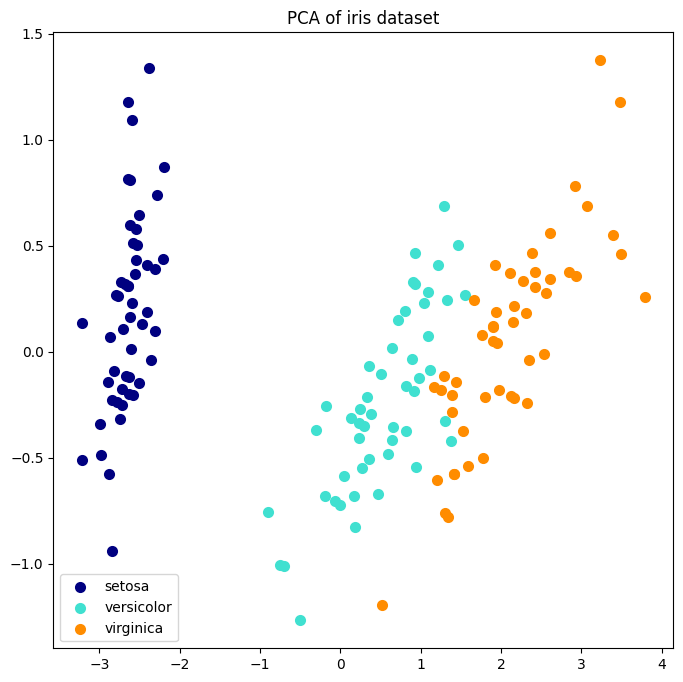

In [10]:
colors = ['navy', 'turquoise', 'darkorange']
title = "PCA"

plt.figure(figsize=(8, 8))
for color, i, target_name in zip(colors, [0, 1, 2], iris.target_names):
    # note that y are targets defined above
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1],
                    color=color, lw=2, label=target_name)

plt.title(title + " of iris dataset")
plt.legend(loc="best", shadow=False, scatterpoints=1)

plt.show()

### Background information:

#### *Explination for this link:* https://scikit-learn.org/stable/auto_examples/decomposition/plot_incremental_pca.html


Principal Component Analysis (PCA) is a technique used for **reducing the dimensionality** of a dataset while preserving its important features.

However, traditional PCA may struggle when dealing with very large datasets that cannot fit into computer memory. Incremental Principal Component Analysis (IPCA) is a method designed to handle this limitation.

In simple terms, here's how IPCA works and why it's useful:

**Memory Efficiency:**
IPCA is designed for scenarios where the dataset is too large to fit into computer memory all at once. Instead of processing the entire dataset simultaneously, IPCA works on smaller batches of data, allowing for more efficient memory usage.

**Incremental Processing:**
IPCA processes the dataset incrementally, meaning it takes one batch of data at a time. This approach allows for the computation of principal components without having to load the entire dataset into memory.

**Similar Projection to PCA:**
IPCA seeks to capture the most important features of the data while using a memory-efficient approach.

**Toy Example for Visualization:**
The example you mentioned is a "toy example" because it's not dealing with a truly massive dataset. Instead, it serves as a visual check to see if IPCA can find a similar projection of the data to PCA, even when processing only a few samples at a time. This demonstration helps validate that IPCA is working as expected and producing results comparable to traditional PCA.


Basically this link proves IPCA can do what PCA does: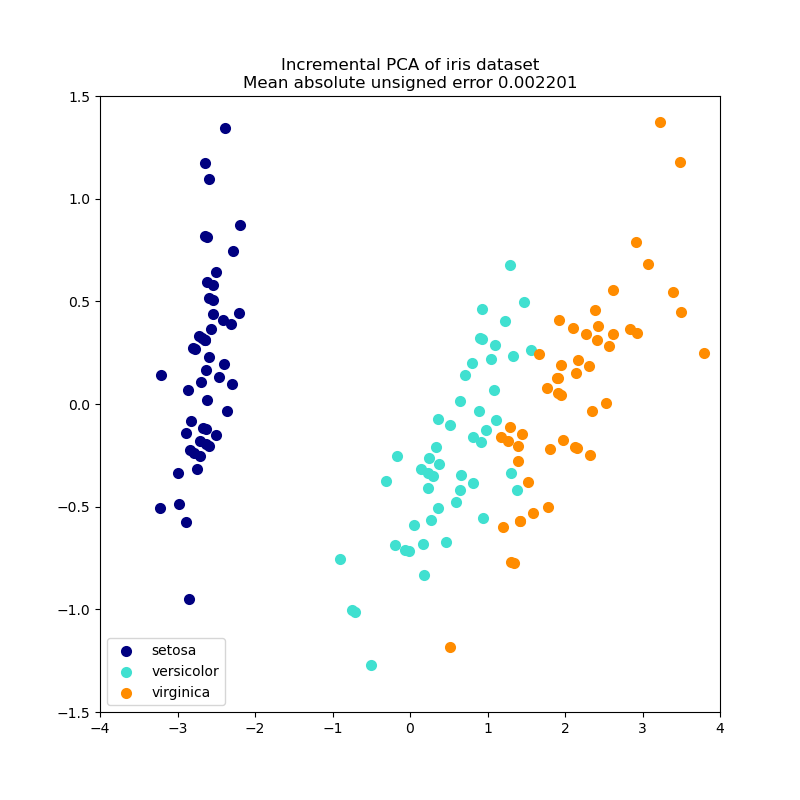

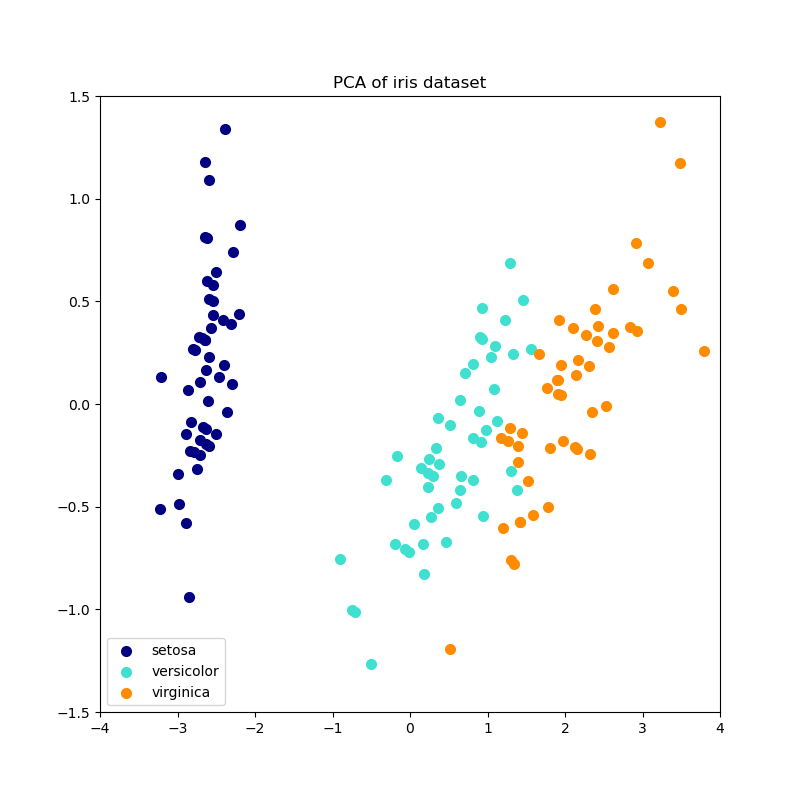


**Reducing dimensionality:** refers to the process of decreasing the number of variables or features in a dataset. In other words, it's a technique used to simplify the representation of data while retaining its essential characteristics.

### Answer:

In the provided code, the Python variable that corresponds to the symbol yj is the variable X_pca.

This is because X_pca gives the outputs and yj is the output.

The range of j is 3.



there are 3 outputs for y.
j represents the index for the output.
j can be 0, 1 or 2
j represents a form of clustering for the flowers.
Therefore the relationship between the number of values of yj (3) relates to the number of data examples (setosa,versicolor,virginica) because each index is assigned to one of these plants.


## Practical Exploration of Hebbian Learning - Part 2 (week 10) Question (3-1)
**(3-1)** Compute `data_rec`, which is the reconstruction of the original data from its compressed 1D representation that is stored in `data_pca`.

[[1.03073034 0.50488764]
 [0.73073034 0.35488764]
 [1.21073034 0.50488764]
 [1.46073034 1.55488764]
 [0.66073034 0.50488764]]
the parameters/axis
[[0.86285419 0.50545291]]
data_pca is the 1D representation of our data:
[[0.80989272]
 [1.29988067]
 [2.04631978]
 [0.82531087]]


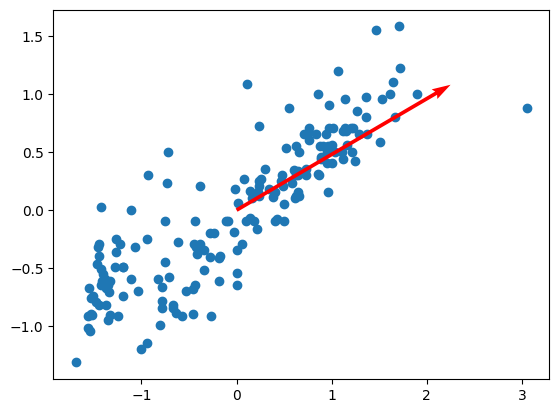

In [11]:
from sklearn.datasets import load_wine
import pandas as pd
import matplotlib.pyplot as plt

wine = load_wine()
#dfwine = pd.DataFrame(wine.data, columns=wine.feature_names)
#print(dfwine.corr())

# we select 2 features that are correlated in this dataset
ind = [wine['feature_names'].index('flavanoids'), wine['feature_names'].index('total_phenols')]
data = wine.data[:,ind]   
# we centre the data to make the code below simpler
data = data - np.mean(data, axis=0)
print(data[0:5,:])

# we will extract 1 component; note that our data is 2D
n_components = 1

pca = PCA(n_components=n_components)

# We fit the model and transform the data in one line.
data_pca = pca.fit_transform(data)
print("the parameters/axis")
print(pca.components_)
print("data_pca is the 1D representation of our data:")
print(data_pca[1:5])

# plot the data with the first PC
plt.scatter(data[:,0], data[:,1])
plt.quiver(pca.components_[0][0], pca.components_[0][1], color=['red'], scale=2)
plt.show()

# data is the original data, and data_pca is the low dimensional representation of the data
# your next step is to compute data_rec, which will be the reconstruction of the original data using data_pca
# we are interested in the errors between data and data_rec

### Answer:

In [12]:
#Computed data_rec
data_rec = pca.inverse_transform(data_pca)

# Print the reconstructed data
print("Reconstructed data:")
print(data_rec[0:5, :])

Reconstructed data:
[[0.98759436 0.57852468]
 [0.69881933 0.40936263]
 [1.12160749 0.65702847]
 [1.7656756  1.03431828]
 [0.71212294 0.41715578]]


In [13]:
from sklearn.metrics import mean_squared_error

# Calculate Mean Squared Error between original and reconstructed data
mse = mean_squared_error(data, data_rec)

print("Mean Squared Error:", mse)

Mean Squared Error: 0.03733228063667125


## Practical Exploration of the Delta Rule (week 11).

 Imagine that you have a dataset with several input features and one target attribute. Assume that the target attribute is named smoker and has values 0 and 1. You have applied the delta rule with the sigmoid activation to learn a predictive model for this dataset, and your final model has S S E O L D = 10 − 4 . Then, you remove the sigmod activation from your model, and (keeping all the weights w unchanged) you recompute the SSE of the modified model. We assume that both SSEs are computed using the same set of data examples. Is it possible that the S S E of the modified model is much higher than the S S E of the original model, e.g., S S E N E W = 10 2 >> S S E O L D = 10 − 4 ? Justify your answer.

Yes.
Removing the sigmoid activation means the model is now a linear regression model.
A linear regression model is not suitable for binary classification tasks (like predicting smoker/non-smoker), where the target attribute have values 0 and 1.
This example is better handled with a non-linear activation like sigmoid because it squashes predictions between a range of 0 and 1.

The reason why this binary example isn't suitable is because if we do linear regression, that creates a line where values can be other than 0 and 1 which is not suitable for this problem.

When you use the derivative of the sigmoid function in the update rule during backpropagation, you are essentially multiplying the error by a small value. This small value helps in making incremental adjustments to the weights. This helps the Neural network learn slowly and steadily.

Sigmoid helps the network learn with caution, ensuring it doesn't overreact. Without it, learning might be too aggressive, potentially causing problems.
